In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

***2) Download and load the Dataset***

In [257]:
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


### 3) -> Univariate Analysis

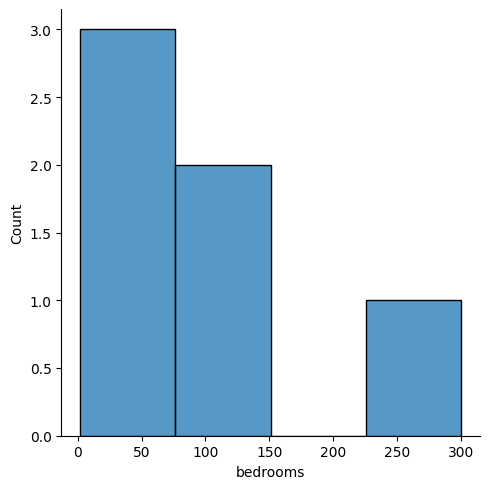

In [258]:
sns.displot(data.bedrooms.value_counts())

([<matplotlib.patches.Wedge at 0x7f15cffa1ea0>,
 [Text(0.28521128309432414, 1.0623815340995388, 'furnished'),
  Text(-0.9645476294288756, -0.5288174264934321, 'semi-furnished'),
  Text(0.7608233961924185, -0.7944480850289933, 'unfurnished')],
 [Text(0.15556979077872224, 0.5794808367815666, '41.65%'),
  Text(-0.5261168887793867, -0.2884458689964175, '32.66%'),
  Text(0.4149945797413191, -0.43333531910672357, '25.69%')])

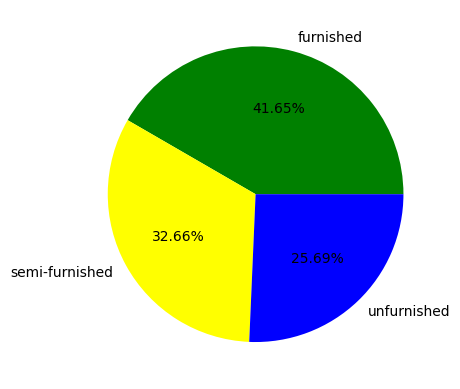

In [259]:
plt.pie(data.furnishingstatus.value_counts(),colors=['green','yellow','blue'],labels=['furnished','semi-furnished','unfurnished'],autopct='%.2f%%')

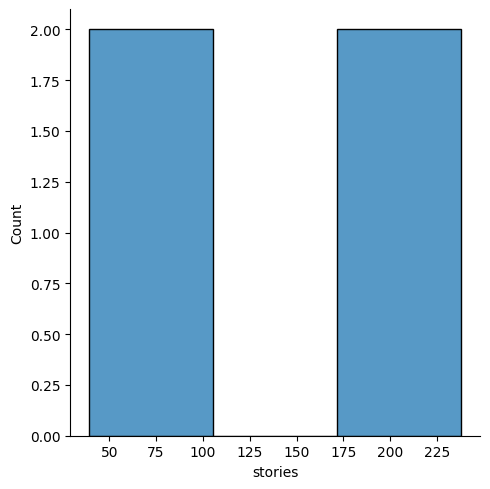

In [260]:
sns.displot(data.stories.value_counts())

([<matplotlib.patches.Wedge at 0x7f15d00822f0>,
 [Text(-0.6022016005293036, 0.9205179152628944, 'yes'),
  Text(0.6022016005293035, -0.9205179152628945, 'no')],
 [Text(-0.32847360028871103, 0.5021006810524877, '68.44%'),
  Text(0.3284736002887109, -0.5021006810524878, '31.56%')])

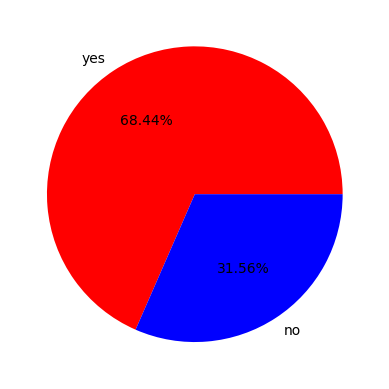

In [261]:
plt.pie(data.airconditioning.value_counts(),colors=['red','blue'],labels=['yes','no'],autopct='%.2f%%')

### 3) -> Bivariate analysis

Text(0, 0.5, 'bathrooms')

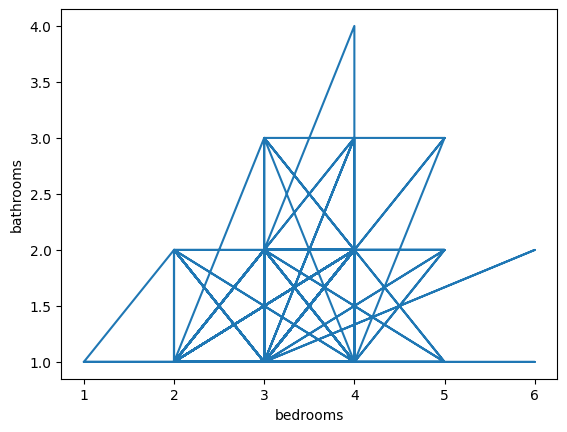

In [262]:
plt.plot(data['bedrooms'],data['bathrooms'])
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')

Text(0, 0.5, 'stories')

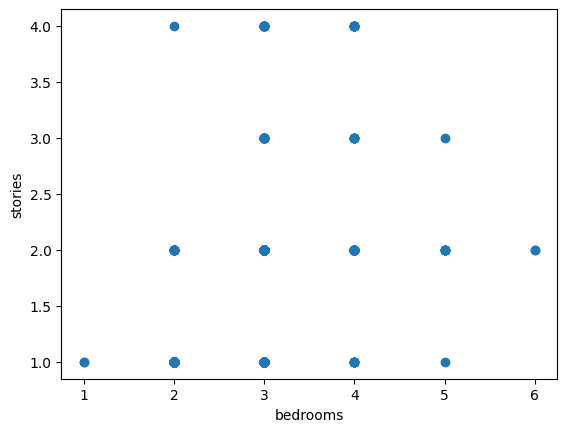

In [263]:
plt.scatter(data['bedrooms'],data['stories'])
plt.xlabel('bedrooms')
plt.ylabel('stories')

Text(0, 0.5, 'stories')

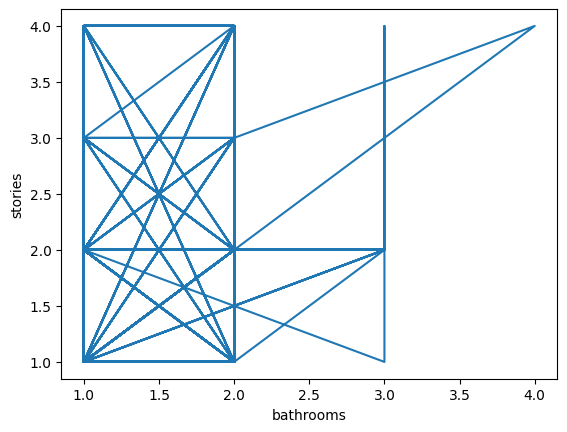

In [264]:
plt.plot(data['bathrooms'],data['stories'])
plt.xlabel('bathrooms')
plt.ylabel('stories')

### 3) -> Multivariate analysis

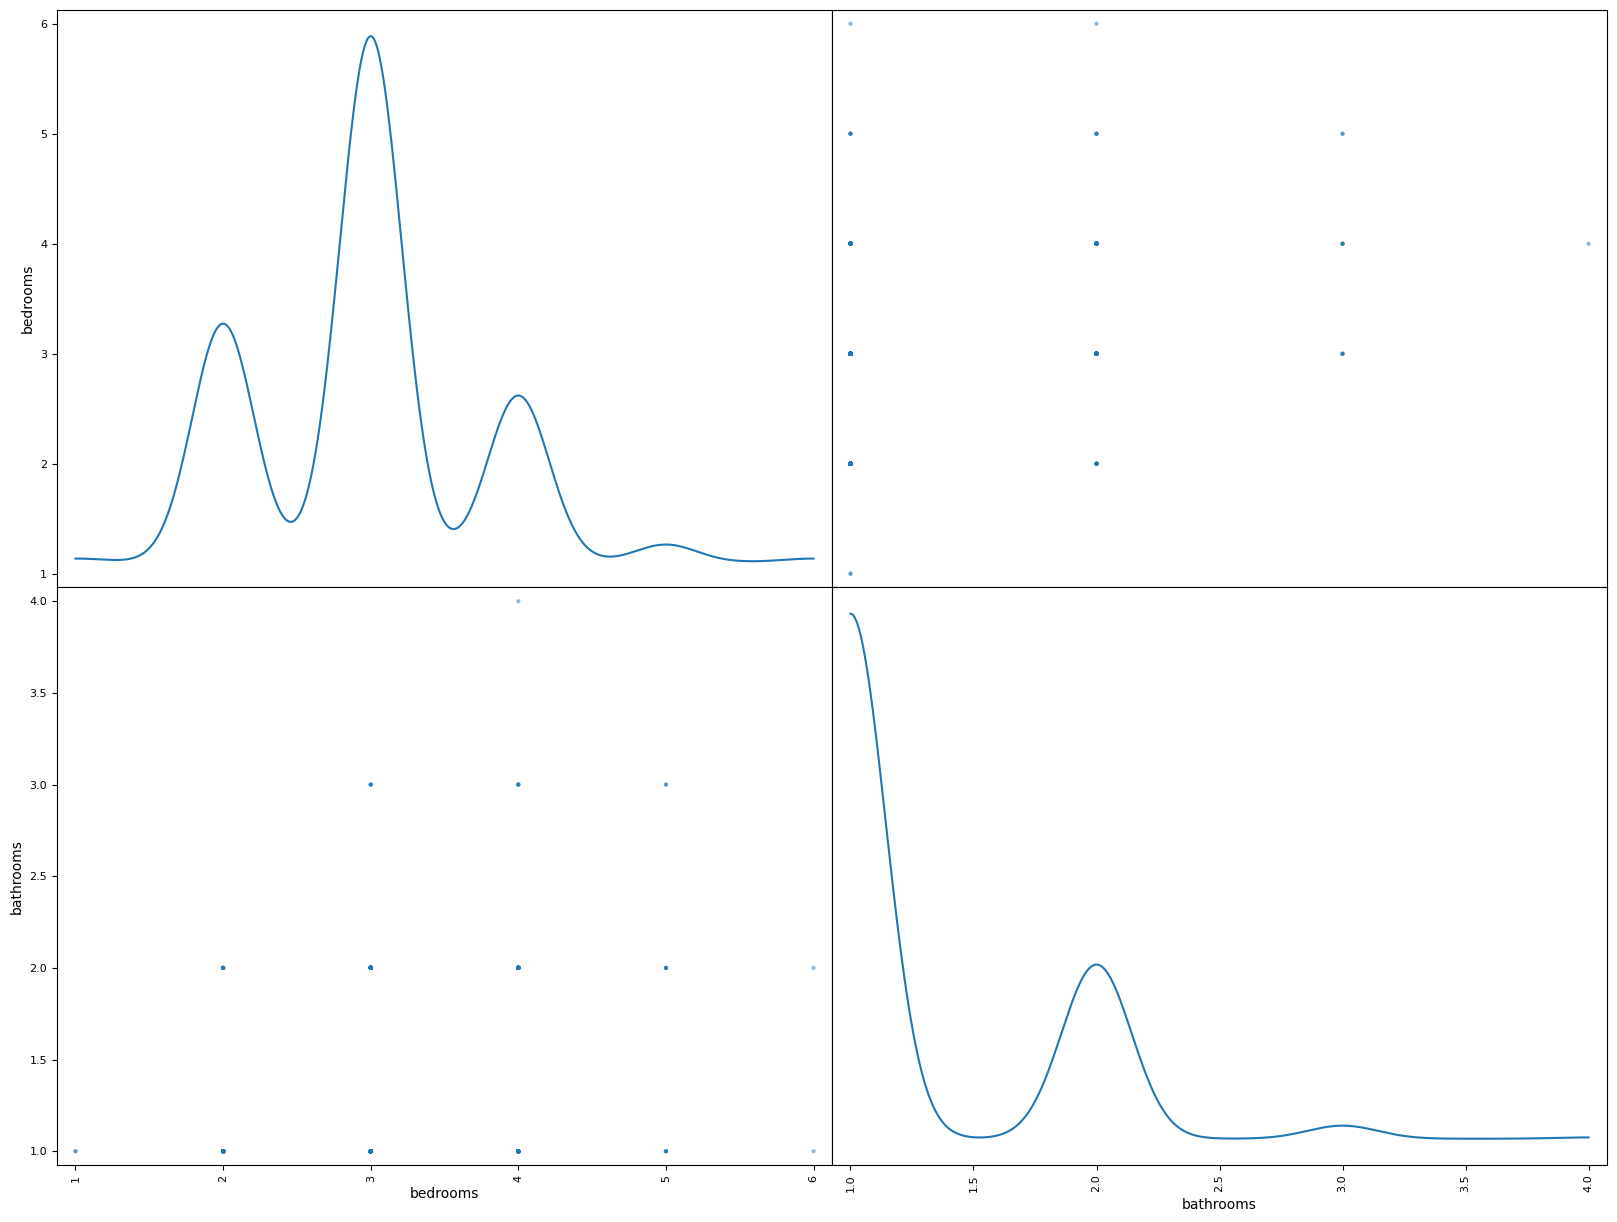

In [265]:
pd.plotting.scatter_matrix(data.loc[:, 'bedrooms':'bathrooms'], diagonal="kde",figsize=(20,15))
plt.show()

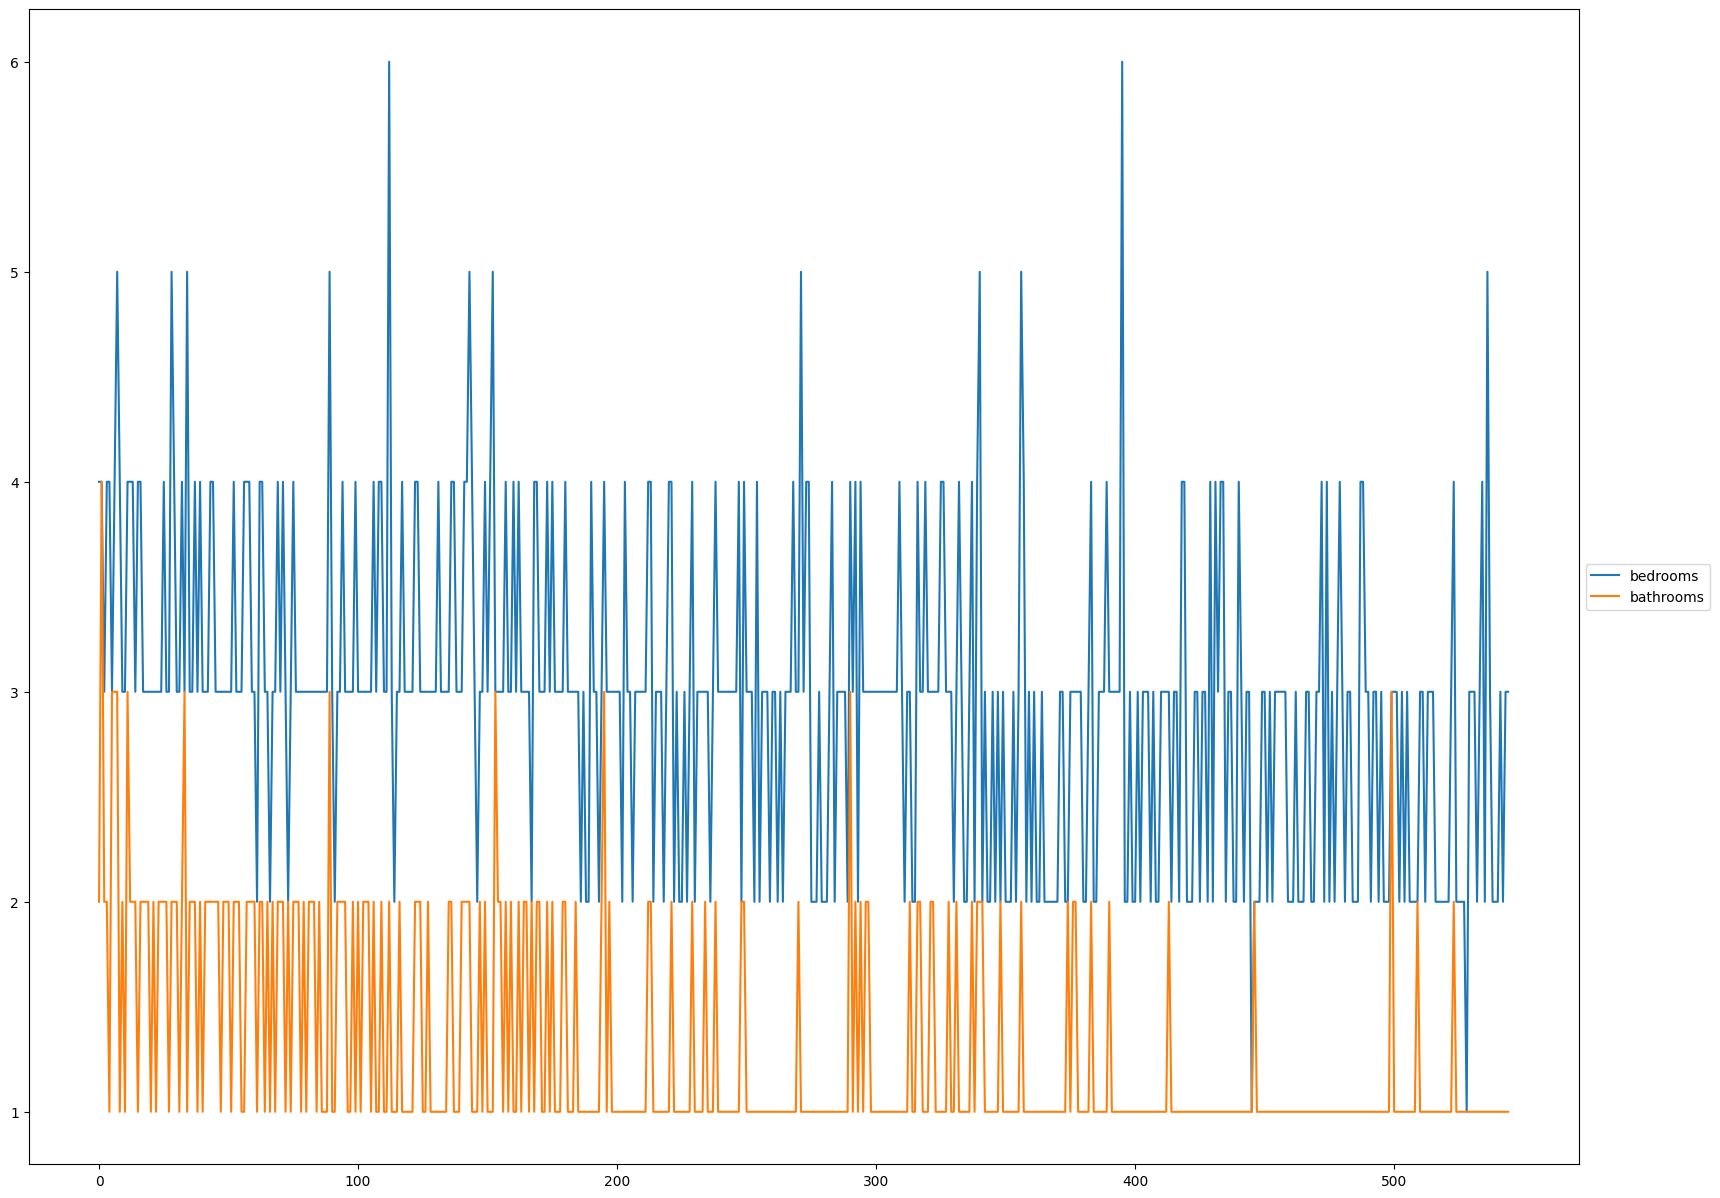

In [266]:
ax = data[["bedrooms","bathrooms"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### 4) Descriptive statistics

In [267]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [268]:
data.var()

<ipython-input-268-6bf595b3cfe5>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
dtype: float64

In [269]:
data.median()

<ipython-input-269-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [270]:
data.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***5) Handling missing values***

In [271]:
data.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
furnishingstatus    False
dtype: bool

In [272]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [273]:
data['stories'].fillna(data['stories'].mode(),inplace=True)
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

***6) finding outliers***

<Axes: >

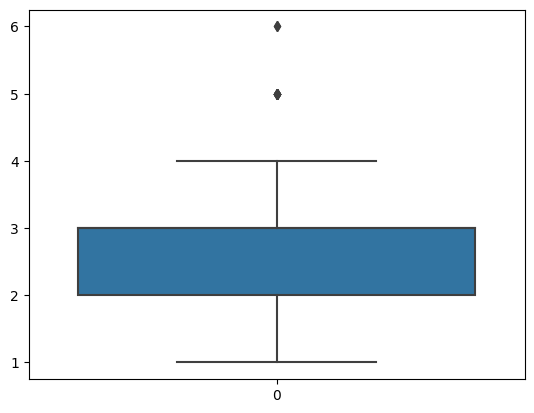

In [274]:
data_new = pd.read_csv("Housing.csv")
sns.boxplot(data_new.bedrooms)

In [275]:
perc99=data.bedrooms.quantile(0.99)
perc99

5.0

<Axes: >

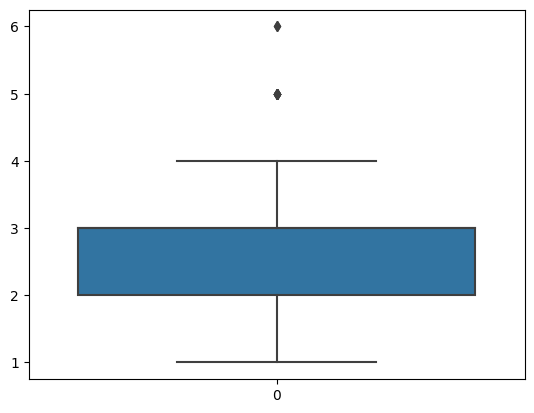

In [276]:
data_new = pd.read_csv("Housing.csv")
data_new=data_new[data_new.bedrooms<=perc99]
sns.boxplot(data.bedrooms)

***7) checking for categorical columns***

In [277]:
le=LabelEncoder()

In [278]:
data.airconditioning=le.fit_transform(data.airconditioning)

In [279]:
data.guestroom=le.fit_transform(data.guestroom)

In [280]:
data.mainroad=le.fit_transform(data.mainroad)

In [281]:
data.basement=le.fit_transform(data.basement)

In [282]:
data.hotwaterheating=le.fit_transform(data.hotwaterheating)

In [283]:
data.furnishingstatus=le.fit_transform(data.furnishingstatus)

In [284]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [285]:
y=data['guestroom']

In [286]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: guestroom, dtype: int64

In [287]:
X=data.drop(columns=['guestroom'],axis=1)

In [288]:
X.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,1,3,0
2,12250000,9960,3,2,2,1,1,0,0,2,1
3,12215000,7500,4,2,2,1,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,0,1,2,0


***9) Scaling independent variables***

In [289]:
X=data.drop(columns=['guestroom','furnishingstatus','mainroad','basement','hotwaterheating','airconditioning'],axis=1)

In [290]:
name=X.columns

In [291]:
name

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [292]:
scale=MinMaxScaler()

In [293]:
X_scaled=scale.fit_transform(X)

In [294]:
X_scaled

array([[1.        , 0.39656357, 0.6       , 0.33333333, 0.66666667,
        0.66666667],
       [0.90909091, 0.5024055 , 0.6       , 1.        , 1.        ,
        1.        ],
       [0.90909091, 0.57113402, 0.4       , 0.33333333, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.13539519, 0.2       , 0.        , 0.        ,
        0.        ],
       [0.        , 0.08659794, 0.4       , 0.        , 0.        ,
        0.        ],
       [0.        , 0.15120275, 0.4       , 0.        , 0.33333333,
        0.        ]])

In [295]:
X=pd.DataFrame(X_scaled,columns=name)

In [296]:
X

,price,area,bedrooms,bathrooms,stories,parking
0,1.000000,0.396564,0.6,0.333333,0.666667,0.666667
1,0.909091,0.502405,0.6,1.000000,1.000000,1.000000
2,0.909091,0.571134,0.4,0.333333,0.333333,0.666667
3,0.906061,0.402062,0.6,0.333333,0.333333,1.000000
4,0.836364,0.396564,0.6,0.000000,0.333333,0.666667
...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,0.666667
541,0.001485,0.051546,0.4,0.000000,0.000000,0.000000
542,0.000000,0.135395,0.2,0.000000,0.000000,0.000000
543,0.000000,0.086598,0.4,0.000000,0.000000,0.000000


***10) Splitting the data into training and testing***

In [297]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [298]:
X=pd.DataFrame(X,columns=name)

In [299]:
X_train.head()

,price,area,bedrooms,bathrooms,stories,parking
542,0.000000,0.135395,0.2,0.0,0.0,0.0
496,0.081818,0.161512,0.2,0.0,0.0,0.0
484,0.096970,0.095533,0.2,0.0,0.0,0.0
507,0.072727,0.134021,0.2,0.0,0.0,0.0
252,0.239394,0.564261,0.4,0.0,0.0,0.0


In [300]:
X_test.head()

,price,area,bedrooms,bathrooms,stories,parking
239,0.245455,0.161512,0.4,0.0,0.333333,0.333333
113,0.375152,0.547766,0.4,0.0,0.000000,0.666667
325,0.195455,0.124399,0.6,0.0,0.333333,0.000000
66,0.448485,0.793814,0.2,0.0,0.000000,0.333333
479,0.103030,0.138144,0.6,0.0,0.333333,0.000000


In [301]:
y_train

542    0
496    0
484    0
507    0
252    0
      ..
70     0
277    0
9      1
359    0
192    1
Name: guestroom, Length: 436, dtype: int64

In [302]:
y_test

239    0
113    0
325    0
66     0
479    0
      ..
76     0
132    0
311    0
464    0
155    0
Name: guestroom, Length: 109, dtype: int64

***11) building the model***

In [303]:
y=data["price"]
X=data.drop(columns=["price"],axis=1)

In [304]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [305]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.01,random_state=0)

In [306]:
from sklearn.linear_model import LinearRegression

In [307]:
model=LinearRegression()

***12) training the model***

In [308]:
model.fit(x_train,y_train)

LinearRegression()

***13) testing the model***

In [309]:
pred=model.predict(x_test)

In [310]:
pred

array([4132602.10623296, 5909768.21867566, 4502527.18510612,
       7290885.77184122, 2924314.19759268, 7149365.39640723])

In [311]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
103    6195000
Name: price, dtype: int64

***14) Measuring the model***

In [312]:
E=pred-y_test
E

239   -452397.893767
113   -173231.781324
325    495027.185106
66     360885.771841
479    -15685.802407
103    954365.396407
Name: price, dtype: float64

In [313]:
from sklearn.metrics import r2_score

In [314]:
r2_score(pred,y_test)*100

90.12083024768481